# 语言模型

语言模型即计算一个句子的概率（即计算组成这个句子一系列词句的概率）

# n-gram语言模型

#### 例子：根据邮件里面的内容区分垃圾邮件和有用邮件（根据内容中的一些词）
1.先将句子进行分词
2.若按照联合概率链规则公式 只考虑一个词语对上上一个词语的依赖关系（二元语法 2-gram）
若只考虑一个词语对上两个词语的依赖关系（三元语法 3-gram）
3.应该考虑一个词对上n个词语之间的依赖关系 即n-gram
4.即马尔可夫假设 下一个词的出现仅依赖与其前面一个词或几个词 即是一个联合概率

如何选择n-gram中的n 不是只要有足够大的语料 n越大越好
n太大会有数据稀疏 不满足大数定律 算出来的概率失真。会出现0概率问题
如果n很大 参数空间多大 维数灾难 词表100000 而n-gram参数为100000^n
原则上 3元更多


# n-gram语言模型的应用

1.词性标注 是一个多分类问题 而一个词可能属于多种词性 根据库来根据概率判断没有根据上下文
而一般来说 形容词后接名词 而不接动词 副词后接动词 不接名词
故可以引入2-gram来根据是一个词的词性来判断该词的词性


2.垃圾邮件的识别 在分类问题上的使用
先对邮件文本进行分类 以句尾标点符号
用n-gram分类器来判断每个句子是否有垃圾句子
当判断垃圾句子超过3个以上 即为垃圾邮件


3.中文分词 也可以理解为一个多分类的问题
在任意假想的一种分词方式一下生成的句子总是唯一的 而在语料库中查看各个分词出现概率
概率小的直接不是最终方案

4.语音识别与机器翻译 也可以用n-gram语言模型
对于中译英
可以有3种翻译结果
在机器翻译中可以使用语言模型3-gram得到最高概率的结果
（在训练的语言模型中概率更高）
在语音识别中也可以转换为文本来得到结果最高的结果作为最终结果


5.平滑技术
为了解决0概率问题
可能在训练语料中未出现的语料 则基于刚才的计算方法就为0概率
最简单平滑处理 其为+1平滑 保证每个n-gram在训练语料至少出现一次
保证概率为1
但平滑处理会造成喧宾夺主现象 将多个未出现语料的概率都相同，效果不佳

# 语言模型的构建

一个基本问题即是为自然语言处理这种上下文相关建立相关的数学模型
这个数学模型即是统计语言模型
解决思路即 一个句子是否合理，就看它的可能性大小如何 可能性大的就该是句子的语言顺序
高阶语言模型n-gram的n取值会取小
训练一个统计语言模型 关键在于解决好样本不足的概率估计问题（解决0概率问题）
根据 古德-图灵原理：没看见的事件，不能认为它发生的概率就为0 则要从概率的总量分配一个很小的比例给这个事件
线性插值
因为 一元组比二元组出现次数要多很多
二元组出现比三元组要高
因此 低阶模型0概率问题比高阶模型要轻微


### 1.从传统语言模型到神经网络语言模型

# 传统的语言模型是基于统计 比如 biggram或n-gram 是对连续n个单词进行建模
这类模型基于马尔可夫假设 这是假设该单词只和前m的单词有依赖关系 
基于该单词的前m个单词出现的条件概率
如果m取0 --即估计该单词在全部文本中相较其他所有单词的频率 ungram
如果m取1 --即为常见的bigram
m取2 --即为trigram
因为n-gram模型只会对文本出现的单词进行建模 当新的文本出现没有在训练文本中出现的单词或词组时
传统语言模型就会出现0概率情况
一个例子即 宾馆和酒店 同意但宾馆可能出现概率会为0
传统的方法会引入一些平滑或back-off的技巧 但整体的效果不好

又会泛化能力不佳，离散模型还依赖于固定的单词组合，需要完全的模式匹配
否则无法正确输出单词出现的概率
即必须一摸一样 意思相近都无法识别

还会有维度诅咒 必须将更多的单词组合挑出来之后才能精确预测特定单词组出现的概率


# 神经网络语言模型（深度学习）

期望深度学习技术可以自动化地学习代表语法和语义特征
解决稀疏性的问题并提高泛化性

主要介绍了两类神经网络学习模型--前馈神经网络模型FFLM和循环神经网络模型RNNLM

FFLM--解决稀疏性
RNNLM解决泛化性

# FFLM模型

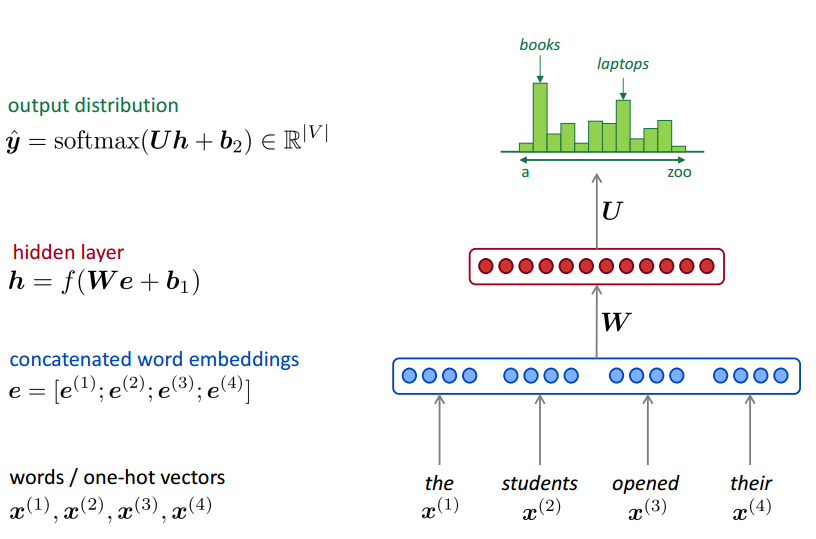

# RNN模型

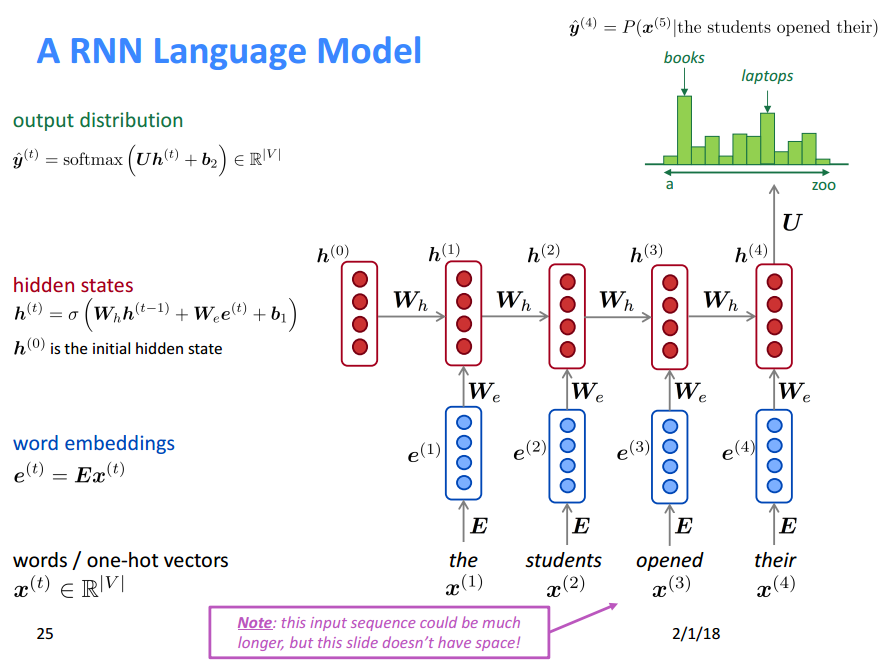

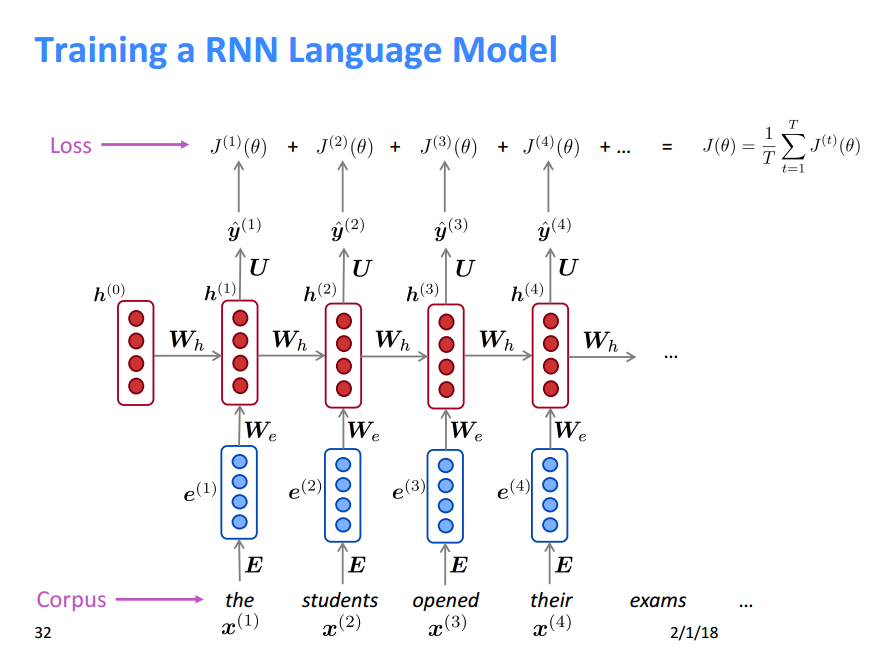

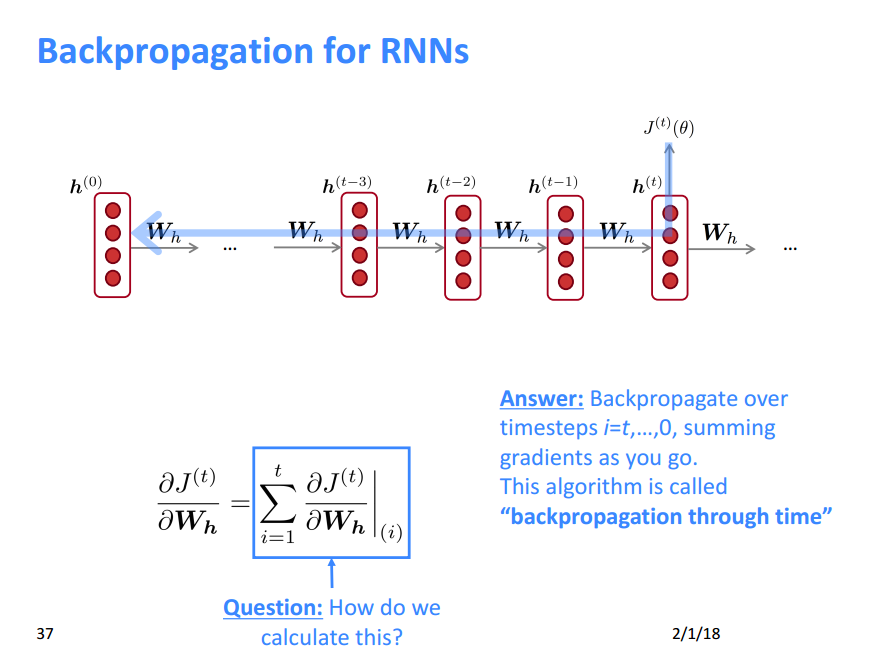

语言模型的评估
1.迷惑度/混乱度 给测试集的句子（正常的句子） 而模型若会赋予高概率值
则该模型优秀 迷惑度小 句子概率越高 模型训练会好

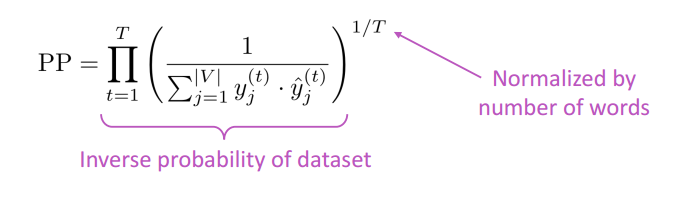

# RNN模型的实现
用pytorch来实现循环神经网络RNN模型
pytorch是facebook的ai生态工具 特点比较好写 效率高 gpu显存利用率高

In [27]:
# 实现参考 https://github.com/pytorch/examples/tree/master/word_language_model
import torch
import torch.nn as nn
import numpy as np
from torch.nn.utils import clip_grad_norm_

class Dictionary(object):
    def __init__(self):
        self.word2idx = {}
        self.idx2word = {}
        self.idx = 0
    
    def add_word(self, word):
        if not word in self.word2idx:
            self.word2idx[word] = self.idx
            self.idx2word[self.idx] = word
            self.idx += 1
    
    def __len__(self):
        return len(self.word2idx)


class Corpus(object):
    def __init__(self):
        self.dictionary = Dictionary()

    def get_data(self, path, batch_size=20):
        # 添加词到字典
        with open(path, 'r') as f:
            tokens = 0
            for line in f:
                words = line.split() + ['<eos>']
                tokens += len(words)
                for word in words: 
                    self.dictionary.add_word(word)  
        
        # 对文件做Tokenize
        ids = torch.LongTensor(tokens)
        token = 0
        with open(path, 'r') as f:
            for line in f:
                words = line.split() + ['<eos>']
                for word in words:
                    ids[token] = self.dictionary.word2idx[word]
                    token += 1
        num_batches = ids.size(0) // batch_size
        ids = ids[:num_batches*batch_size]
        return ids.view(batch_size, -1)

# 有gpu的情况下使用gpu
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#device = torch.device('cpu')

# 超参数的设定
embed_size = 128    # 词嵌入的维度
hidden_size = 1024  # LSTM的hidden size
num_layers = 1
num_epochs = 5      # 迭代轮次
num_samples = 1000  # 测试语言模型生成句子时的样本数
batch_size = 20     # 一批样本的数量
seq_length = 30     # 序列长度
learning_rate = 0.002 # 学习率

# 加载数据集
corpus = Corpus()
ids = corpus.get_data('train.txt', batch_size)
vocab_size = len(corpus.dictionary)
num_batches = ids.size(1) // seq_length


# RNN语言模型
class RNNLM(nn.Module):
    def __init__(self, vocab_size, embed_size, hidden_size, num_layers):
        super(RNNLM, self).__init__()
        self.embed = nn.Embedding(vocab_size, embed_size)
        self.lstm = nn.LSTM(embed_size, hidden_size, num_layers, batch_first=True)
        self.linear = nn.Linear(hidden_size, vocab_size)
        
    def forward(self, x, h):
        # 词嵌入
        x = self.embed(x)
        
        # LSTM前向运算
        out, (h, c) = self.lstm(x, h)
        
        # 把结果变更为(batch_size*sequence_length, hidden_size)的维度
        out = out.reshape(out.size(0)*out.size(1), out.size(2))
        
        # 全连接
        out = self.linear(out)
        return out, (h, c)

model = RNNLM(vocab_size, embed_size, hidden_size, num_layers).to(device)

# 损失构建与优化
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# 反向传播过程“截断”(不复制gradient)
def detach(states):
    return [state.detach() for state in states] 

# 训练模型
for epoch in range(num_epochs):
    # 初始化为0
    states = (torch.zeros(num_layers, batch_size, hidden_size).to(device),
              torch.zeros(num_layers, batch_size, hidden_size).to(device))
    
    for i in range(0, ids.size(1) - seq_length, seq_length):
        # 获取mini batch的输入和输出
        inputs = ids[:, i:i+seq_length].to(device)
        targets = ids[:, (i+1):(i+1)+seq_length].to(device)
        
        # 前向运算
        states = detach(states)
        outputs, states = model(inputs, states)
        loss = criterion(outputs, targets.reshape(-1))
        
        # 反向传播与优化
        model.zero_grad()
        loss.backward()
        clip_grad_norm_(model.parameters(), 0.5)
        optimizer.step()

        step = (i+1) // seq_length
        if step % 100 == 0:
            print ('全量数据迭代轮次 [{}/{}], Step数[{}/{}], 损失Loss: {:.4f}, 困惑度/Perplexity: {:5.2f}'
                   .format(epoch+1, num_epochs, step, num_batches, loss.item(), np.exp(loss.item())))

# 测试语言模型
with torch.no_grad():
    with open('sample.txt', 'w') as f:
        # 初始化为0
        state = (torch.zeros(num_layers, 1, hidden_size).to(device),
                 torch.zeros(num_layers, 1, hidden_size).to(device))

        # 随机选择一个词作为输入
        prob = torch.ones(vocab_size)
        input = torch.multinomial(prob, num_samples=1).unsqueeze(1).to(device)

        for i in range(num_samples):
            # 从输入词开始，基于语言模型前推计算
            output, state = model(input, state)

            # 做预测
            prob = output.exp()
            word_id = torch.multinomial(prob, num_samples=1).item()

            # 填充预估结果（为下一次预估储备输入数据）
            input.fill_(word_id)

            # 写出输出结果
            word = corpus.dictionary.idx2word[word_id]
            word = '\n' if word == '<eos>' else word + ' '
            f.write(word)

            if (i+1) % 100 == 0:
                print('生成了 [{}/{}] 个词，存储到 {}'.format(i+1, num_samples, 'sample.txt'))

# 存储模型的保存点(checkpoints)
torch.save(model.state_dict(), 'model.ckpt')

全量数据迭代轮次 [1/5], Step数[0/1549], 损失Loss: 9.2110, 困惑度/Perplexity: 10006.20
全量数据迭代轮次 [1/5], Step数[100/1549], 损失Loss: 6.0322, 困惑度/Perplexity: 416.63
全量数据迭代轮次 [1/5], Step数[200/1549], 损失Loss: 5.9489, 困惑度/Perplexity: 383.33
全量数据迭代轮次 [1/5], Step数[300/1549], 损失Loss: 5.7170, 困惑度/Perplexity: 304.00
全量数据迭代轮次 [1/5], Step数[400/1549], 损失Loss: 5.6745, 困惑度/Perplexity: 291.34
全量数据迭代轮次 [1/5], Step数[500/1549], 损失Loss: 5.1400, 困惑度/Perplexity: 170.72
全量数据迭代轮次 [1/5], Step数[600/1549], 损失Loss: 5.2119, 困惑度/Perplexity: 183.44
全量数据迭代轮次 [1/5], Step数[700/1549], 损失Loss: 5.3577, 困惑度/Perplexity: 212.23
全量数据迭代轮次 [1/5], Step数[800/1549], 损失Loss: 5.1927, 困惑度/Perplexity: 179.94
全量数据迭代轮次 [1/5], Step数[900/1549], 损失Loss: 5.0940, 困惑度/Perplexity: 163.04
全量数据迭代轮次 [1/5], Step数[1000/1549], 损失Loss: 5.1573, 困惑度/Perplexity: 173.69
全量数据迭代轮次 [1/5], Step数[1100/1549], 损失Loss: 5.3188, 困惑度/Perplexity: 204.14
全量数据迭代轮次 [1/5], Step数[1200/1549], 损失Loss: 5.1839, 困惑度/Perplexity: 178.38
全量数据迭代轮次 [1/5], Step数[1300/1549], 损失Loss: 5.1042, 困惑度/Perplex

# KenLM统计语言模型构建与应用 
应该在linux上实现 后补



# 完成一个智能纠错的文本任务

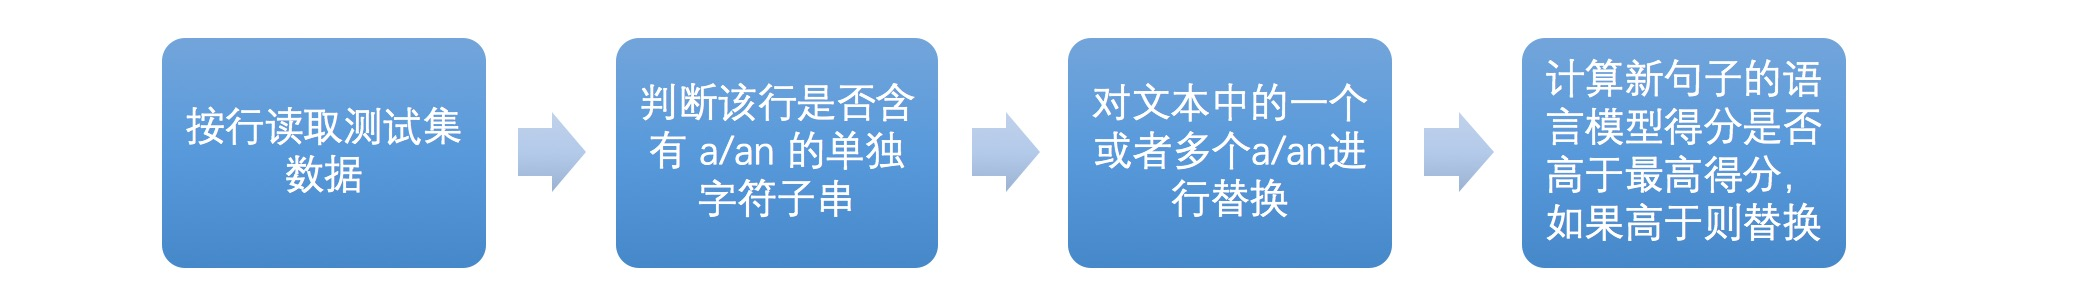

In [39]:
import nltk

In [38]:
def get_target_num(sentence):
    if " a " in line or " an " in line:
        count = Counter(nltk.word_tokenize(line))["a"] + Counter(nltk.word_tokenize(line))["an"]
        return count

如果原句没有a和an 则结束
如果有 4个a或an 则有16种更改情况

思路：
1.先将所有句子中的a和an替换成##
2.统计a和an的个数 并根据个数知道有几种排列组合情况
3.对句子中的##用生成好的方式逐个填充情况
4.评估每一种情况 得到句子概率最大的情况

In [40]:
!pip install -i https://pypi.tuna.tsinghua.edu.cn/simple nltk
nltk.download('punkt')

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Z\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [41]:
import codecs
from collections import Counter
import nltk

In [42]:
# 读取文件的方法
def readfile(filepath):
    fp = codecs.open(filepath, "r", encoding="utf-8")
    content = fp.read()
    fp.close()
    return content

In [43]:
# 按行加载文件
def read_words_list(filepath):
    wordslist = readfile(filepath).splitlines()
    return wordslist

In [44]:
# 保存文件的方法
def save_file(savepath, content):
    fp = codecs.open(savepath,"w",encoding='utf-8')
    fp.write(content)
    fp.close()

In [45]:
# 对 a 和 an 分布的可能性进行枚举，然后对句子中 a/an 所在的位置进行替换插入
def generate_candidate_list(template_str, count):
    res = []
    tem_arr =  template_str.split()
    all_iters = list(product(("a", "an"), repeat = count)) 
    for iter in all_iters:
        sentence = generate_sentence(tem_arr, iter)
        res.append(sentence)
    return res

In [46]:
# 将列表中的数据插入到句子的占位符中
def generate_sentence(tem_arr, iter):
    s = []
    id = 0
    for i in range(0,len(tem_arr)):
        term = tem_arr[i]
        if term != "###":
            s.append(term)
        else:
            s.append(iter[id])
            id += 1
    return ' '.join(s)  

In [52]:
# 定义输入和输出文件
input_file = "1.txt"
output_file = "./output_correction.txt"

In [53]:
# 判断句子中是否存在一个 a/an ，如果有就将对应的 a 替换成 an
# 分别对含有 a 和 an 的句子进行打分，用语言模型判别每个句子的的得分
# 如果替换后的得分更加高了，那么说明原来句子里的 a/an 使用错误。
def spelling_correction(input_file, output_file):
    for line in read_words_list(input_file):   
        if " a " in line or " an " in line:
            # 获取句子中含有的 a/an 单独子串的数量
            count = Counter(nltk.word_tokenize(line))["a"] + Counter(nltk.word_tokenize(line))["an"]
            # 将句子中相应位置的子串都变为占位符
            line_new = line.replace(" a ", " ### ")
            line_new = line.replace(" an ", " ### ")
            # 得到新生成的替换后的句子列表
            candidates = generate_candidate_list(line_new, count)

            # 判断得分最高的句子是否为原句子
            line_best = line 
            changed = 0     # 相比较使用句子字符串比对或者重新比较原句子和最高分句子的得分，使用标志位的方法更加方便。
            for s in candidates:
                if model.score(s) > model.score(line_best):
                    line_best = s 
                    changed += 1               
                if changed != 0:     
                    changed_line_num += 1
                    str_output = str(changed_line_num) + ":\n" + line + "\n>>\n" + line_best + "\n"
                    print(str_output)
                    save_file(output_file, str_output)
    print("完成所有内容校对和纠正!")

In [54]:
spelling_correction(input_file, output_file)

NameError: name 'product' is not defined

In [60]:
import codecs
from collections import Counter
import nltk
from itertools import product

# 读取文件的方法
def readfile(filepath):
    fp = codecs.open(filepath, "r", encoding="utf-8")
    content = fp.read()
    fp.close()
    return content

# 按行加载文件
def read_words_list(filepath):
    wordslist = readfile(filepath).splitlines()
    return wordslist

# 保存文件的方法
def save_file(savepath, content):
    fp = codecs.open(savepath,"w",encoding='utf-8')
    fp.write(content)
    fp.close()

# 对 a 和 an 分布的可能性进行枚举，然后对句子中 a/an 所在的位置进行替换插入
def generate_candidate_list(template_str, count):
    res = []
    tem_arr =  template_str.split()
    all_iters = list(product(("a", "an"), repeat = count)) 
    for iter in all_iters:
        sentence = generate_sentence(tem_arr, iter)
        res.append(sentence)
    return res

# 将列表中的数据插入到句子的占位符中
def generate_sentence(tem_arr, iter):
    s = []
    id = 0
    for i in range(0,len(tem_arr)):
        term = tem_arr[i]
        if term != "###":
            s.append(term)
        else:
            s.append(iter[id])
            id += 1
    return ' '.join(s)         

# 定义输入和输出文件
input_file = "1.txt"
output_file = "./output_correction.txt"

# 判断句子中是否存在一个 a/an ，如果有就将对应的 a 替换成 an
# 分别对含有 a 和 an 的句子进行打分，用语言模型判别每个句子的的得分
# 如果替换后的得分更加高了，那么说明原来句子里的 a/an 使用错误。
def spelling_correction(input_file, output_file):
    for line in read_words_list(input_file):   
        if " a " in line or " an " in line:
            # 获取句子中含有的 a/an 单独子串的数量
            count = Counter(nltk.word_tokenize(line))["a"] + Counter(nltk.word_tokenize(line))["an"]
            # 将句子中相应位置的子串都变为占位符
            line_new = line.replace(" a ", " ### ")
            line_new = line.replace(" an ", " ### ")
            # 得到新生成的替换后的句子列表
            candidates = generate_candidate_list(line_new, count)

            # 判断得分最高的句子是否为原句子
            line_best = line 
            changed = 0     # 相比较使用句子字符串比对或者重新比较原句子和最高分句子的得分，使用标志位的方法更加方便。
            for s in candidates:
                if model.score(s) > model.score(line_best):
                    line_best = s 
                    changed += 1               
                if changed != 0:     
                    changed_line_num += 1
                    str_output = str(changed_line_num) + ":\n" + line + "\n>>\n" + line_best + "\n"
                    print(str_output)
                    save_file(output_file, str_output)
    print("完成所有内容校对和纠正!")

In [61]:
spelling_correction(input_file, output_file)

AttributeError: 'RNNLM' object has no attribute 'score'